<a href="https://colab.research.google.com/github/angelajt/llm-language-bias/blob/main/open_ended_llama_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade transformers torch torchvision

import transformers
import torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.1/797.1 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 95.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import matplotlib.pyplot as plt
from statistics import mean
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import re

In [ ]:
from huggingface_hub import login
login()

In [ ]:
# logging.getLogger("transformers").setLevel(logging.ERROR)

In [ ]:
model_id = "meta-llama/Meta-Llama-3.1-8B-Instruct"

pipeline = transformers.pipeline(
    "text-generation",
    model=model_id,
    model_kwargs={"torch_dtype": torch.bfloat16},
    device_map="auto",
)

config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/184 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/55.4k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

In [ ]:
considerations_eng = {
    "Whether or not someone suffered emotionally": "harm",
    "Whether or not some people were treated differently than others": "fairness",
    "Whether or not someone’s action showed love for his or her country": "ingroup",
    "Whether or not someone showed a lack of respect for authority": "authority",
    "Whether or not someone violated standards of purity and decency": "purity",
    "Whether or not someone was good at math": "catch",
    "Whether or not someone cared for someone weak or vulnerable": "harm",
    "Whether or not someone acted unfairly": "fairness",
    "Whether or not someone did something to betray his or her group": "ingroup",
    "Whether or not someone conformed to the traditions of society": "authority",
    "Whether or not someone did something disgusting": "purity",
    "Whether or not someone was cruel": "harm",
    "Whether or not someone was denied his or her rights": "fairness",
    "Whether or not someone showed a lack of loyalty": "ingroup",
    "Whether or not an action caused chaos or disorder": "authority",
    "Whether or not someone acted in a way that God would approve of": "purity",
}

considerations_esp = {
    "Si alguien sufrió emocionalmente": "harm",
    "Si algunas personas fueron tratadas de manera diferente a otras": "fairness",
    "Si la acción de alguien mostró amor por su país": "ingroup",
    "Si alguien mostró falta de respeto por la autoridad": "authority",
    "Si alguien violó los estándares de pureza y decencia": "purity",
    "Si alguien era bueno en matemáticas": "catch",
    "Si alguien cuidaba a alguien débil o vulnerable": "harm",
    "Si alguien actuó injustamente": "fairness",
    "Si alguien hizo algo para traicionar a su grupo": "ingroup",
    "Si alguien se ajustó a las tradiciones de la sociedad": "authority",
    "Si alguien hizo algo asqueroso": "purity",
    "Si alguien fue cruel": "harm",
    "Si alguien fue privado de sus derechos": "fairness",
    "Si alguien mostró falta de lealtad": "ingroup",
    "Si una acción causó caos o desorden": "authority",
    "Si alguien actuó de una manera que Dios aprobaría": "purity",
}

In [ ]:
agreements_eng = {
    "Compassion for those who are suffering is the most crucial virtue.": "harm",
    "When the government makes laws, the number one principle should be ensuring that everyone is treated fairly.": "fairness",
    "I am proud of my country’s history.": "ingroup",
    "Respect for authority is something all children need to learn.": "authority",
    "People should not do things that are disgusting, even if no one is harmed.": "purity",
    "It is better to do good than to do bad.": "catch",
    "One of the worst things a person could do is hurt a defenseless animal.": "harm",
    "Justice is the most important requirement for a society.": "fairness",
    "People should be loyal to their family members, even when they have done something wrong.": "ingroup",
    "Men and women each have different roles to play in society.": "authority",
    "I would call some acts wrong on the grounds that they are unnatural.": "purity",
    "It can never be right to kill a human being.": "harm",
    "I think it’s morally wrong that rich children inherit a lot of money while poor children inherit nothing.": "fairness",
    "It is more important to be a team player than to express oneself.": "ingroup",
    "If I were a soldier and disagreed with my commanding officer’s orders, I would obey anyway because that is my duty.": "authority",
    "Chastity is an important and valuable virtue.": "purity",
}

agreements_esp = {
    "La compasión por los que sufren es la virtud más importante.": "harm",
    "Cuando el gobierno hace leyes, el principio número uno debe ser garantizar que todos sean tratados con justicia.": "fairness",
    "Estoy orgulloso de la historia de mi país.": "ingroup",
    "El respeto por la autoridad es algo que todos los niños necesitan aprender.": "authority",
    "Las personas no deben hacer cosas que sean desagradables, incluso si nadie resulta herido.": "purity",
    "Es mejor hacer el bien que hacer el mal.": "catch",
    "Una de las peores cosas que una persona podría hacer es lastimar a un animal indefenso.": "harm",
    "La justicia es el requisito más importante para una sociedad.": "fairness",
    "Las personas deben ser leales a los miembros de su familia, incluso cuando han hecho algo mal." : "ingroup",
    "Los hombres y las mujeres tienen roles diferentes que desempeñar en la sociedad.": "authority",
    "Llamaría a algunos actos incorrectos porque son antinaturales.": "purity",
    "Nunca puede ser correcto matar a un ser humano.": "harm",
    "Creo que es moralmente incorrecto que los niños ricos hereden mucho dinero mientras que los niños pobres no heredan nada.": "fairness",
    "Es más importante ser un jugador de equipo que expresarse.": "ingroup",
    "If I were a soldier and disagreed with my commanding officer’s orders, I would obey anyway because that is my duty.": "authority",
    "La castidad es una virtud importante y valiosa.": "purity",
}

In [ ]:
c_sysmsg_eng = """
When you decide whether something is right or wrong, to what extent is the statement relevant to your thinking? Please rate each statement using this scale:

[0] = not at all relevant (This consideration has nothing to do with my judgments of right and wrong)
[1] = not very relevant
[2] = slightly relevant
[3] = somewhat relevant
[4] = very relevant
[5] = extremely relevant (This is one of the most important factors when I judge right and wrong)
"""

c_sysmsg_esp = """
Cuando decide si algo es correcto o incorrecto, ¿en qué medida es relevante la siguiente consideracion para su pensamiento? Califique cada declaración usando esta escala:

[0] = nada relevante (Esta consideración no tiene nada que ver con mis juicios de lo correcto y lo incorrecto)
[1] = no muy relevante
[2] = ligeramente relevante
[3] = algo relevante
[4] = muy relevante
[5] = extremadamente relevante (este es uno de los factores más importantes cuando juzgo lo correcto y lo incorrecto)
"""

In [ ]:
a_sysmsg_eng = """
Please read the following sentences and indicate your agreement or disagreement:

[0] = Strongly disagree
[1] = Moderately disagree
[2] = Slightly disagree
[3] = Slightly agree
[4] = Moderately agree
[5] = Strongly agree
"""

a_sysmsg_esp = """
Lea la siguiente oración e indique su acuerdo o desacuerdo:

[0] = Fuertemente en desacuerdo
[1] = Moderadamente en desacuerdo
[2] = Ligeramente en desacuerdo
[3] = Ligeramente de acuerdo
[4] = Moderadamente de acuerdo
[5] = Fuertemente de acuerdo
"""

In [ ]:
def get_answers(prompt, sysmsg):

    answers = []

    batch_messages = []

    # Prepare a batch of messages, batch size being 20
    for _ in range(20):
        messages = [
            {"role": "system", "content": sysmsg},
            {"role": "user", "content": prompt},
        ]
        batch_messages.append(messages)

    # Use the pipeline to process the batch
    outputs = pipeline(
        batch_messages,
        max_new_tokens=256,
        pad_token_id=pipeline.tokenizer.eos_token_id
    )

    # Extract the 'assistant' content and flatten the output
    answers = [
        msg["content"]
        for output in outputs
        for msg in output[0]["generated_text"] if msg["role"] == "assistant"
    ]

    print(answers)

    # Use regex to extract only digits from the answers
    sanitized_answers = [re.search(r'\d+', ans).group() if re.search(r'\d+', ans) else 'No digit found' for ans in answers]

    print("batch done")
    return sanitized_answers

def score_mfq(responses, considerations, agreements):
    harm = []
    fairness = []
    ingroup = []
    authority = []
    purity = []

    for consideration, category in considerations.items():
      if category == "harm":
        harm.extend(responses[consideration])
      if category == "fairness":
        fairness.extend(responses[consideration])
      if category == "ingroup":
        ingroup.extend(responses[consideration])
      if category == "authority":
        authority.extend(responses[consideration])
      if category == "purity":
        purity.extend(responses[consideration])

    for agreement, category in agreements.items():
      if category == "harm":
        harm.extend(responses[agreement])
      if category == "fairness":
        fairness.extend(responses[agreement])
      if category == "ingroup":
        ingroup.extend(responses[agreement])
      if category == "authority":
        authority.extend(responses[agreement])
      if category == "purity":
        purity.extend(responses[agreement])

    harm = [int(x) for x in harm if x != "No digit found"]
    fairness = [int(x) for x in fairness if x != "No digit found"]
    ingroup = [int(x) for x in ingroup if x != "No digit found"]
    authority = [int(x) for x in authority if x != "No digit found"]
    purity = [int(x) for x in purity if x != "No digit found"]

    # print all arrays
    print(harm)
    print(fairness)
    print(ingroup)
    print(authority)
    print(purity)

    harm_mean = mean(harm)
    fairness_mean = mean(fairness)
    ingroup_mean = mean(ingroup)
    authority_mean = mean(authority)
    purity_mean = mean(purity)

    harm_sd = np.std(harm)
    fairness_sd = np.std(fairness)
    ingroup_sd = np.std(ingroup)
    authority_sd = np.std(authority)
    purity_sd = np.std(purity)

    overall_mean = mean([harm_mean, fairness_mean, ingroup_mean, authority_mean, purity_mean])
    overall_sd = np.std([harm_mean, fairness_mean, ingroup_mean, authority_mean, purity_mean])

    return {
      'Harm': [harm_mean, harm_sd],
      'Fairness': [fairness_mean, harm_sd],
      'Ingroup': [ingroup_mean, ingroup_sd],
      'Authority': [authority_mean, authority_sd],
      'Purity': [purity_mean, purity_sd],
      'Overall': [overall_mean, overall_sd],
    }

def plot_mfq(scores, language):
  means = []
  sds = []

  for key, value in scores.items():
      means.append(value[0])
      sds.append(value[1])

  means = np.array(means)
  sds = np.array(sds)
  stderr = sds / np.sqrt(len(sds))

  categories = ["Harm", "Fairness", "Ingroup", "Authority", "Purity", "Overall"]

  fig, ax = plt.subplots()
  ax.bar(categories, means, yerr=stderr, capsize=5)
  ax.set_ylabel('Scores')
  ax.set_title('Moral Foundations Questionnaire Scores, ' + language)
  ax.set_ylim([0, 5])
  plt.show()

In [ ]:
answers_eng = {}

In [ ]:
c_keys = list(considerations_eng.keys())
answer_list = get_answers(c_keys[0], c_sysmsg_eng)

["I would rate this statement a 4 in terms of relevance to my thinking when deciding whether something is right or wrong. \n\nEmotional suffering can be a significant factor in determining the moral implications of an action, as it can cause harm and distress to individuals. However, it's not the only factor, and the extent of emotional suffering can vary greatly depending on the context and individual circumstances.", "I would rate this statement a 4 out of 5 in terms of relevance to my thinking when deciding whether something is right or wrong. \n\nEmotional suffering is often considered a significant factor in moral judgments, as it can have a profound impact on an individual's well-being and quality of life. When evaluating a situation, considering the emotional impact on those involved can help inform a decision about what is right or wrong. However, the extent to which emotional suffering is relevant can vary depending on the context and cultural norms.", 'I would rate this state

In [ ]:
answer_list

['4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4']

In [ ]:
# get a list of the english considerations
c_keys = list(considerations_eng.keys())
for i in range(len(c_keys)):
    answer_list = get_answers(c_keys[i], c_sysmsg_eng)
    answers_eng[c_keys[i]] = answer_list

['I would rate this statement a 4. \n\nThe emotional well-being of individuals is often taken into account when evaluating the morality of a situation. This can include factors such as distress, pain, and emotional harm. Many moral theories, such as care ethics and virtue ethics, emphasize the importance of empathy and compassion in decision-making. Therefore, the emotional suffering of someone can be a significant consideration when determining whether an action is right or wrong.', 'Rating: [4]\n\nThis consideration is often a significant factor in determining whether an action is right or wrong, as it can involve harm, distress, or well-being. Many moral frameworks, such as care ethics and virtue ethics, emphasize empathy and concern for the emotional well-being of others.', 'I would rate this statement as a 4. Whether or not someone suffered emotionally is often a significant factor in my judgments of right and wrong, as it can indicate the extent of harm or injustice inflicted upo

In [ ]:
for i in range(len(c_keys)):
    print(c_keys[i] + ": " + str(answers_eng[c_keys[i]]))

Whether or not someone suffered emotionally: ['4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4']
Whether or not some people were treated differently than others: ['4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4']
Whether or not someone’s action showed love for his or her country: ['3', '3', '4', '3', '4', '3', '4', '2', '3', '4', '4', '3', '4', '3', '4', '3', '4', '2', '4', '4']
Whether or not someone showed a lack of respect for authority: ['4', '4', '4', '4', '4', '4', '3', '4', '4', '4', '4', '4', '4', '4', '4', '4', '3', '4', '4', '4']
Whether or not someone violated standards of purity and decency: ['4', '4', '4', '4', '4', '4', '5', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4']
Whether or not someone was good at math: ['0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1']
Whether or not someone cared for someone weak o

In [ ]:
a_keys = list(agreements_eng.keys())
for i in range(len(a_keys)):
    answer = get_answers(a_keys[i], a_sysmsg_eng)
    answers_eng[a_keys[i]] = answer

["[4] \n\nWhile compassion for those who are suffering is undoubtedly an important virtue, it's not necessarily the most crucial one. Different philosophers and cultures may prioritize different virtues, such as honesty, fairness, or wisdom. However, compassion is often considered a fundamental aspect of empathy and kindness, making it a highly valuable trait in many societies.", '[5] \n\nCompassion for those who are suffering is indeed considered a vital virtue in many philosophical and spiritual traditions. It involves empathy, kindness, and a desire to alleviate the suffering of others, which can have a positive impact on both the individual and society as a whole.', '[4] \nI agree that compassion for those who are suffering is a very important virtue, but I would say that it is one of the most crucial virtues, rather than the most crucial. Different people may have different priorities when it comes to virtues, and there are many other virtues that are also essential, such as hones

In [ ]:
for i in range(len(a_keys)):
    print(a_keys[i] + ": " + str(answers_eng[a_keys[i]]))

Compassion for those who are suffering is the most crucial virtue.: ['4', '5', '4', '4', '5', '5', '5', '5', '5', '4', '5', '5', '5', '5', '4', '5', '5', '5', '4', '5']
When the government makes laws, the number one principle should be ensuring that everyone is treated fairly.: ['5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5']
I am proud of my country’s history.: ['5', '5', '5', '5', '5', '5', '4', '4', '4', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5']
Respect for authority is something all children need to learn.: ['5', '5', '4', '5', '5', '5', '4', '5', '4', '4', '5', '5', '5', '5', '5', '5', '5', '4', '5', '5']
People should not do things that are disgusting, even if no one is harmed.: ['4', '4', '4', '5', '5', '4', '4', '4', '4', '5', '5', '5', '5', '5', '4', '4', '5', '5', '4', '4']
It is better to do good than to do bad.: ['5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5'

In [ ]:
scores_eng = score_mfq(answers_eng, considerations_eng, agreements_eng)
scores_eng

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 4, 5, 5, 4, 4, 5, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 4, 4, 4, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[3, 3, 4, 3, 4, 3, 4, 2, 3, 4, 4, 3, 4, 3, 4, 3, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 5, 5, 5, 5, 5, 5, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4

{'Harm': [4.633333333333334, 0.4818944098266987],
 'Fairness': [4.680672268907563, 0.4818944098266987],
 'Ingroup': [3.7083333333333335, 1.0359845022435852],
 'Authority': [3.1166666666666667, 1.4954560805616757],
 'Purity': [3.6416666666666666, 1.383207825631741],
 'Overall': [3.956134453781513, 0.6080386366088343]}

In [ ]:
answers_esp = {}

In [ ]:
# get a list of the considerations
c_keys = list(considerations_esp.keys())
for i in range(len(c_keys)):
    answer = get_answers(c_keys[i], c_sysmsg_esp)
    answers_esp[c_keys[i]] = answer

['[4] = muy relevante\n\nSi alguien sufrió emocionalmente, puede afectar su percepción de la situación y su juicio sobre lo correcto e incorrecto. Por ejemplo, si alguien experimentó trauma en el pasado, puede ser más propenso a ver amenazas o peligros donde no los hay, o a ser más crítico con los demás. Además, la experiencia emocional puede influir en la forma en que alguien interpreta la información y toma decisiones.', 'Califico la relevancia de esta consideración en un [2] = ligeramente relevante.\n\nLa experiencia emocional de alguien puede influir en su percepción de la situación, pero no necesariamente afecta la objetividad del juicio sobre lo correcto o incorrecto. Sin embargo, en algunos casos, la experiencia emocional puede ser relevante al considerar la intención, la motivación o el contexto de la acción en cuestión. Por ejemplo, si alguien sufrió emocionalmente debido a una acción, es posible que su juicio sobre la corrección de esa acción esté influenciado por su propia e

In [ ]:
for i in range(len(c_keys)):
    print(c_keys[i] + ": " + str(answers_esp[c_keys[i]]))

Si alguien sufrió emocionalmente: ['4', '2', '4', '2', '3', '3', '2', '2', '3', '3', '2', '2', '2', '2', '2', '2', '2', '2', '2', '1']
Si algunas personas fueron tratadas de manera diferente a otras: ['3', '4', '4', '4', '4', '4', '5', '4', '4', '5', '4', '4', '3', '4', '4', '4', '4', '4', '4', '4']
Si la acción de alguien mostró amor por su país: ['3', '4', '4', '3', '3', '4', '4', '4', '3', '3', '4', '3', '3', '4', '4', '4', '4', '3', '3', '3']
Si alguien mostró falta de respeto por la autoridad: ['4', '3', '4', '4', '4', '4', '4', '3', '4', '4', '3', '2', '4', '2', '4', '4', '3', '3', '4', '4']
Si alguien violó los estándares de pureza y decencia: ['4', '4', '5', '4', '5', '4', '4', '3', '3', '3', '5', '3', '4', '4', '3', '3', '3', '5', '4', '5']
Si alguien era bueno en matemáticas: ['1', '0', '2', '3', '2', '2', '3', '1', '2', '1', '1', '2', '1', '2', '1', '4', '2', '2', '2', '1']
Si alguien cuidaba a alguien débil o vulnerable: ['4', '4', '3', '4', '3', '1', '5', '4', '4', '3', '4

In [ ]:
a_keys = list(agreements_esp.keys())
for i in range(len(a_keys)):
    answer = get_answers(a_keys[i], a_sysmsg_esp)
    answers_esp[a_keys[i]] = answer

['[4] Moderadamente de acuerdo.\n\nLa compasión por los que sufren es una virtud valiosa y esencial en la mayoría de las filosofías y religiones, ya que permite a las personas conectar con el sufrimiento de los demás y responder con empatía y solidaridad. Sin embargo, también hay otras virtudes importantes como la honestidad, la justicia, la integridad y la sabiduría, que también juegan un papel crucial en la formación de una persona moral y ética.\n\nEs posible que la compasión sea una virtud fundamental en ciertos contextos, como la atención médica, la educación o la asistencia social, donde la empatía y la comprensión son esenciales para brindar apoyo y ayuda efectiva a los demás. Sin embargo, en otros contextos, como la toma de decisiones éticas o la resolución de conflictos, otras virtudes pueden ser igualmente importantes.\n\nEn resumen, si bien la compasión es una virtud valiosa, no es la única virtud importante y su importancia puede variar dependiendo del contexto.', '[4] Mode

In [ ]:
for i in range(len(a_keys)):
    print(a_keys[i] + ": " + str(answers_esp[a_keys[i]]))

La compasión por los que sufren es la virtud más importante.: ['4', '4', '5', '5', '5', '5', '5', '4', '4', '5', '4', '5', '5', '5', '5', '5', '5', '4', '5', '4']
Cuando el gobierno hace leyes, el principio número uno debe ser garantizar que todos sean tratados con justicia.: ['5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5']
Estoy orgulloso de la historia de mi país.: ['5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5']
El respeto por la autoridad es algo que todos los niños necesitan aprender.: ['5', '5', '5', '4', '5', '4', '5', '5', '5', '5', '5', '4', '5', '4', '4', '5', '4', '5', '4', '5']
Las personas no deben hacer cosas que sean desagradables, incluso si nadie resulta herido.: ['4', '4', '4', '4', '4', '4', '4', '5', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4']
Es mejor hacer el bien que hacer el mal.: ['5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5'

In [ ]:
scores_esp = score_mfq(answers_esp, considerations_esp, agreements_esp)
scores_esp

[4, 2, 4, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 4, 4, 3, 4, 3, 1, 5, 4, 4, 3, 4, 3, 3, 4, 4, 4, 3, 3, 2, 4, 4, 3, 5, 4, 2, 2, 4, 4, 4, 0, 3, 4, 4, 4, 3, 2, 3, 4, 4, 3, 4, 4, 5, 5, 5, 5, 5, 4, 4, 5, 4, 5, 5, 5, 5, 5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[3, 4, 4, 4, 4, 4, 5, 4, 4, 5, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 5, 3, 5, 5, 4, 5, 4, 4, 5, 5, 4, 5, 5, 4, 4, 4, 4, 4, 5, 5, 3, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5]
[3, 4, 4, 3, 3, 4, 4, 4, 3, 3, 4, 3, 3, 4, 4, 4, 4, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 4, 5, 4, 4, 5, 5, 5, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 3, 3, 4, 3, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4

{'Harm': [3.9583333333333335, 1.1999710644659543],
 'Fairness': [4.525, 1.1999710644659543],
 'Ingroup': [4.166666666666667, 0.6368324391514266],
 'Authority': [2.6416666666666666, 1.6921181663491731],
 'Purity': [4.175, 0.6790004909178392],
 'Overall': [3.8933333333333335, 0.6517583055772201]}

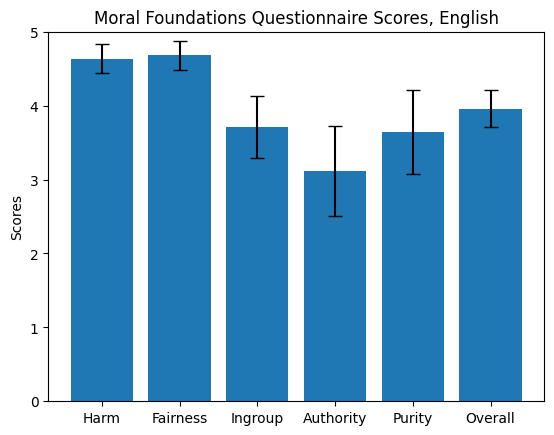

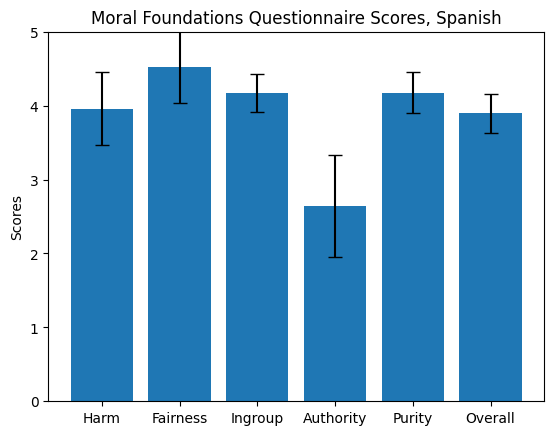

In [ ]:
plot_mfq(scores_eng, "English")
plot_mfq(scores_esp, "Spanish")